In [27]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [28]:
df = pd.read_csv("white wine.csv")

In [29]:
df

,Year,Month,Relative Interest
0,2010,1,54
1,2010,2,54
2,2010,3,58
3,2010,4,52
4,2010,5,61
...,...,...,...
67,2015,8,81
68,2015,9,72
69,2015,10,70
70,2015,11,83


In [30]:
df.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [32]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [33]:
df.dtypes

Year                  int64
Month                 int64
Relative Interest     int64
date                 object
dtype: object

In [34]:
df['date'] = pd.DatetimeIndex(df['date'])
df.head()

,Year,Month,Relative Interest,date
0,2010,1,54,2010-01-01
1,2010,2,54,2010-02-01
2,2010,3,58,2010-03-01
3,2010,4,52,2010-04-01
4,2010,5,61,2010-05-01


In [35]:
df.dtypes

Year                          int64
Month                         int64
Relative Interest             int64
date                 datetime64[ns]
dtype: object

In [36]:
df=df[["date","Relative Interest"]]
df.head()

,date,Relative Interest
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61


<AxesSubplot:xlabel='date'>

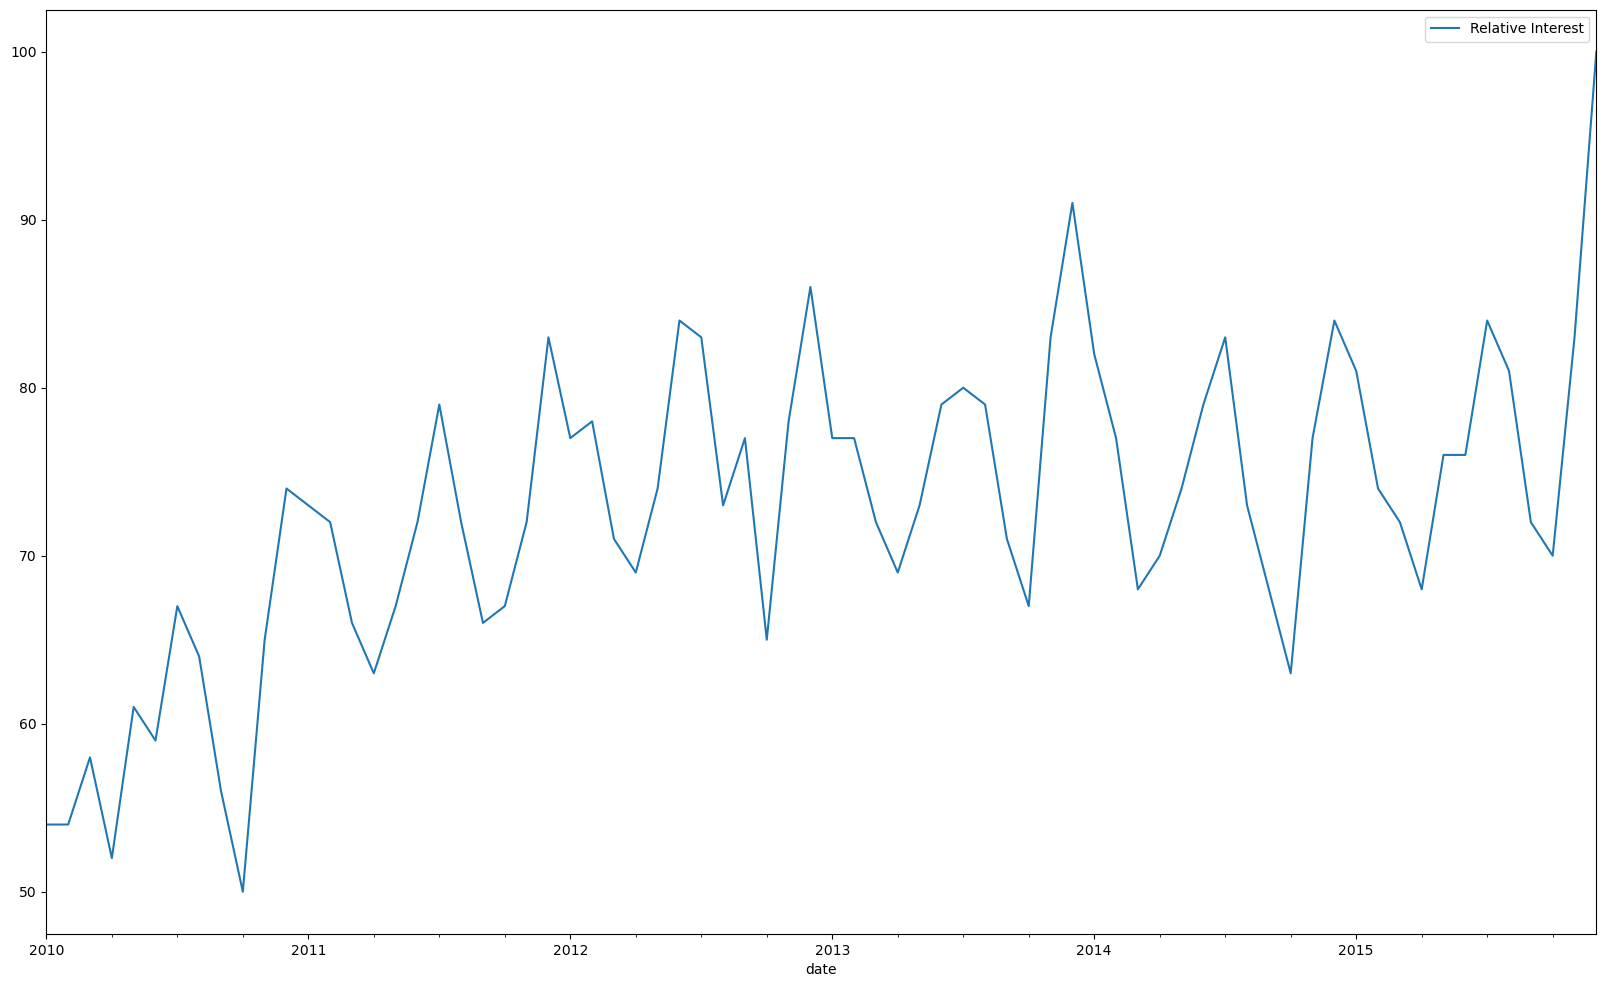

In [37]:
df.set_index('date').plot(figsize=(20, 12))

In [38]:
df.columns = ['ds','y']

In [39]:
df.tail()

,ds,y
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83
71,2015-12-01,100


In [41]:
train = df.iloc[:len(df)-20]
test = df.iloc[len(df)-20:]

In [42]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=77,freq= 'MS') #MS for monthly, H for hourly
forecast = m.predict(future)

20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future.tail()

,ds
124,2020-05-01
125,2020-06-01
126,2020-07-01
127,2020-08-01
128,2020-09-01


In [44]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
124,2020-05-01,81.512171,63.766234,95.076327,66.156510,96.354739,-1.540208,-1.540208,-1.540208,-1.540208,-1.540208,-1.540208,0.0,0.0,0.0,79.971962
125,2020-06-01,81.574232,71.260863,102.713815,65.826721,96.575267,5.922523,5.922523,5.922523,5.922523,5.922523,5.922523,0.0,0.0,0.0,87.496756
126,2020-07-01,81.634292,69.374670,102.251379,65.724147,96.816436,4.606401,4.606401,4.606401,4.606401,4.606401,4.606401,0.0,0.0,0.0,86.240692
127,2020-08-01,81.696353,63.216043,96.151175,65.557893,97.198661,-1.861147,-1.861147,-1.861147,-1.861147,-1.861147,-1.861147,0.0,0.0,0.0,79.835206
128,2020-09-01,81.758415,62.007726,96.120171,65.292714,97.636325,-1.832266,-1.832266,-1.832266,-1.832266,-1.832266,-1.832266,0.0,0.0,0.0,79.926149


In [45]:
df.tail()

,ds,y
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83
71,2015-12-01,100


In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
124,2020-05-01,79.971962,63.766234,95.076327
125,2020-06-01,87.496756,71.260863,102.713815
126,2020-07-01,86.240692,69.374670,102.251379
127,2020-08-01,79.835206,63.216043,96.151175
128,2020-09-01,79.926149,62.007726,96.120171


In [47]:
test.tail()

,ds,y
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83
71,2015-12-01,100


In [48]:
plot_plotly(m ,forecast)

In [49]:
plot_components_plotly(m, forecast)

In [50]:
from statsmodels.tools.eval_measures import rmse

In [51]:
predictions = forecast.iloc[-20:]['yhat']

In [52]:

print("Mean Value of Test Dataset:", test['y'].mean())

Mean Value of Test Dataset: 76.9
